<a href="https://colab.research.google.com/github/Adamkoda2306/Students_Performance_Prediction/blob/main/DecisionTree_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decision Tree Regression**

# ***Installing Libraries***

In [1]:
!pip install numpy pandas matplotlib seaborn scikit-learn joblib

# ***Importing Libraries***

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# ***Loading the Dataset***

In [3]:
dataset = pd.read_csv('student_performance.csv')

print("Dataset Overview:")
print(dataset.head())

print("\nMissing Values:")
print(dataset.isnull().sum())

Dataset Overview:
   StudentID     Name  Gender  AttendanceRate  StudyHoursPerWeek  \
0          1     John    Male              85                 15   
1          2    Sarah  Female              90                 20   
2          3     Alex    Male              78                 10   
3          4  Michael    Male              92                 25   
4          5     Emma  Female              88                 18   

   PreviousGrade  ExtracurricularActivities ParentalSupport  FinalGrade  
0             78                          1            High          80  
1             85                          2          Medium          87  
2             65                          0             Low          68  
3             90                          3            High          92  
4             82                          2          Medium          85  

Missing Values:
StudentID                    0
Name                         0
Gender                       0
AttendanceRate     

## **Removing and Adding Required Columns in the Dataset**

In [4]:
columns_to_keep = ['AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade', 'ExtracurricularActivities', 'ParentalSupport', 'FinalGrade']
dataset = dataset[columns_to_keep]

dataset['ParentalSupport'] = dataset['ParentalSupport'].replace({
    'High': 3,
    'Medium': 2,
    'Low': 1,
})

print("\nUpdated Dataset:")
print(dataset)


Updated Dataset:
       AttendanceRate  StudyHoursPerWeek  PreviousGrade  \
0                  85                 15             78   
1                  90                 20             85   
2                  78                 10             65   
3                  92                 25             90   
4                  88                 18             82   
...               ...                ...            ...   
80005              91                 19             75   
80006              95                 24             67   
80007              96                 21             91   
80008              70                 18             89   
80009              92                 32             81   

       ExtracurricularActivities  ParentalSupport  FinalGrade  
0                              1                3          80  
1                              2                2          87  
2                              0                1          68  
3                

<ipython-input-4-132627962896>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['ParentalSupport'] = dataset['ParentalSupport'].replace({
<ipython-input-4-132627962896>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['ParentalSupport'] = dataset['ParentalSupport'].replace({


# ***Features and Target***

In [5]:
X = dataset[['AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade', 'ExtracurricularActivities', 'ParentalSupport']]
y = dataset['FinalGrade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Number of training samples: {len(X_train)}")
print(f"Number of testing samples: {len(X_test)}")

Number of training samples: 64008
Number of testing samples: 16002


# **Training and Testing DecisionTree Regression Model**

In [6]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# **Evaluate the Model**

In [7]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

print(f"Accuracy: {r2*100}")

Mean Squared Error: 14.846635056034662
R-squared: 0.7115720517933337
Accuracy: 71.15720517933337


# **Visualize the Model**

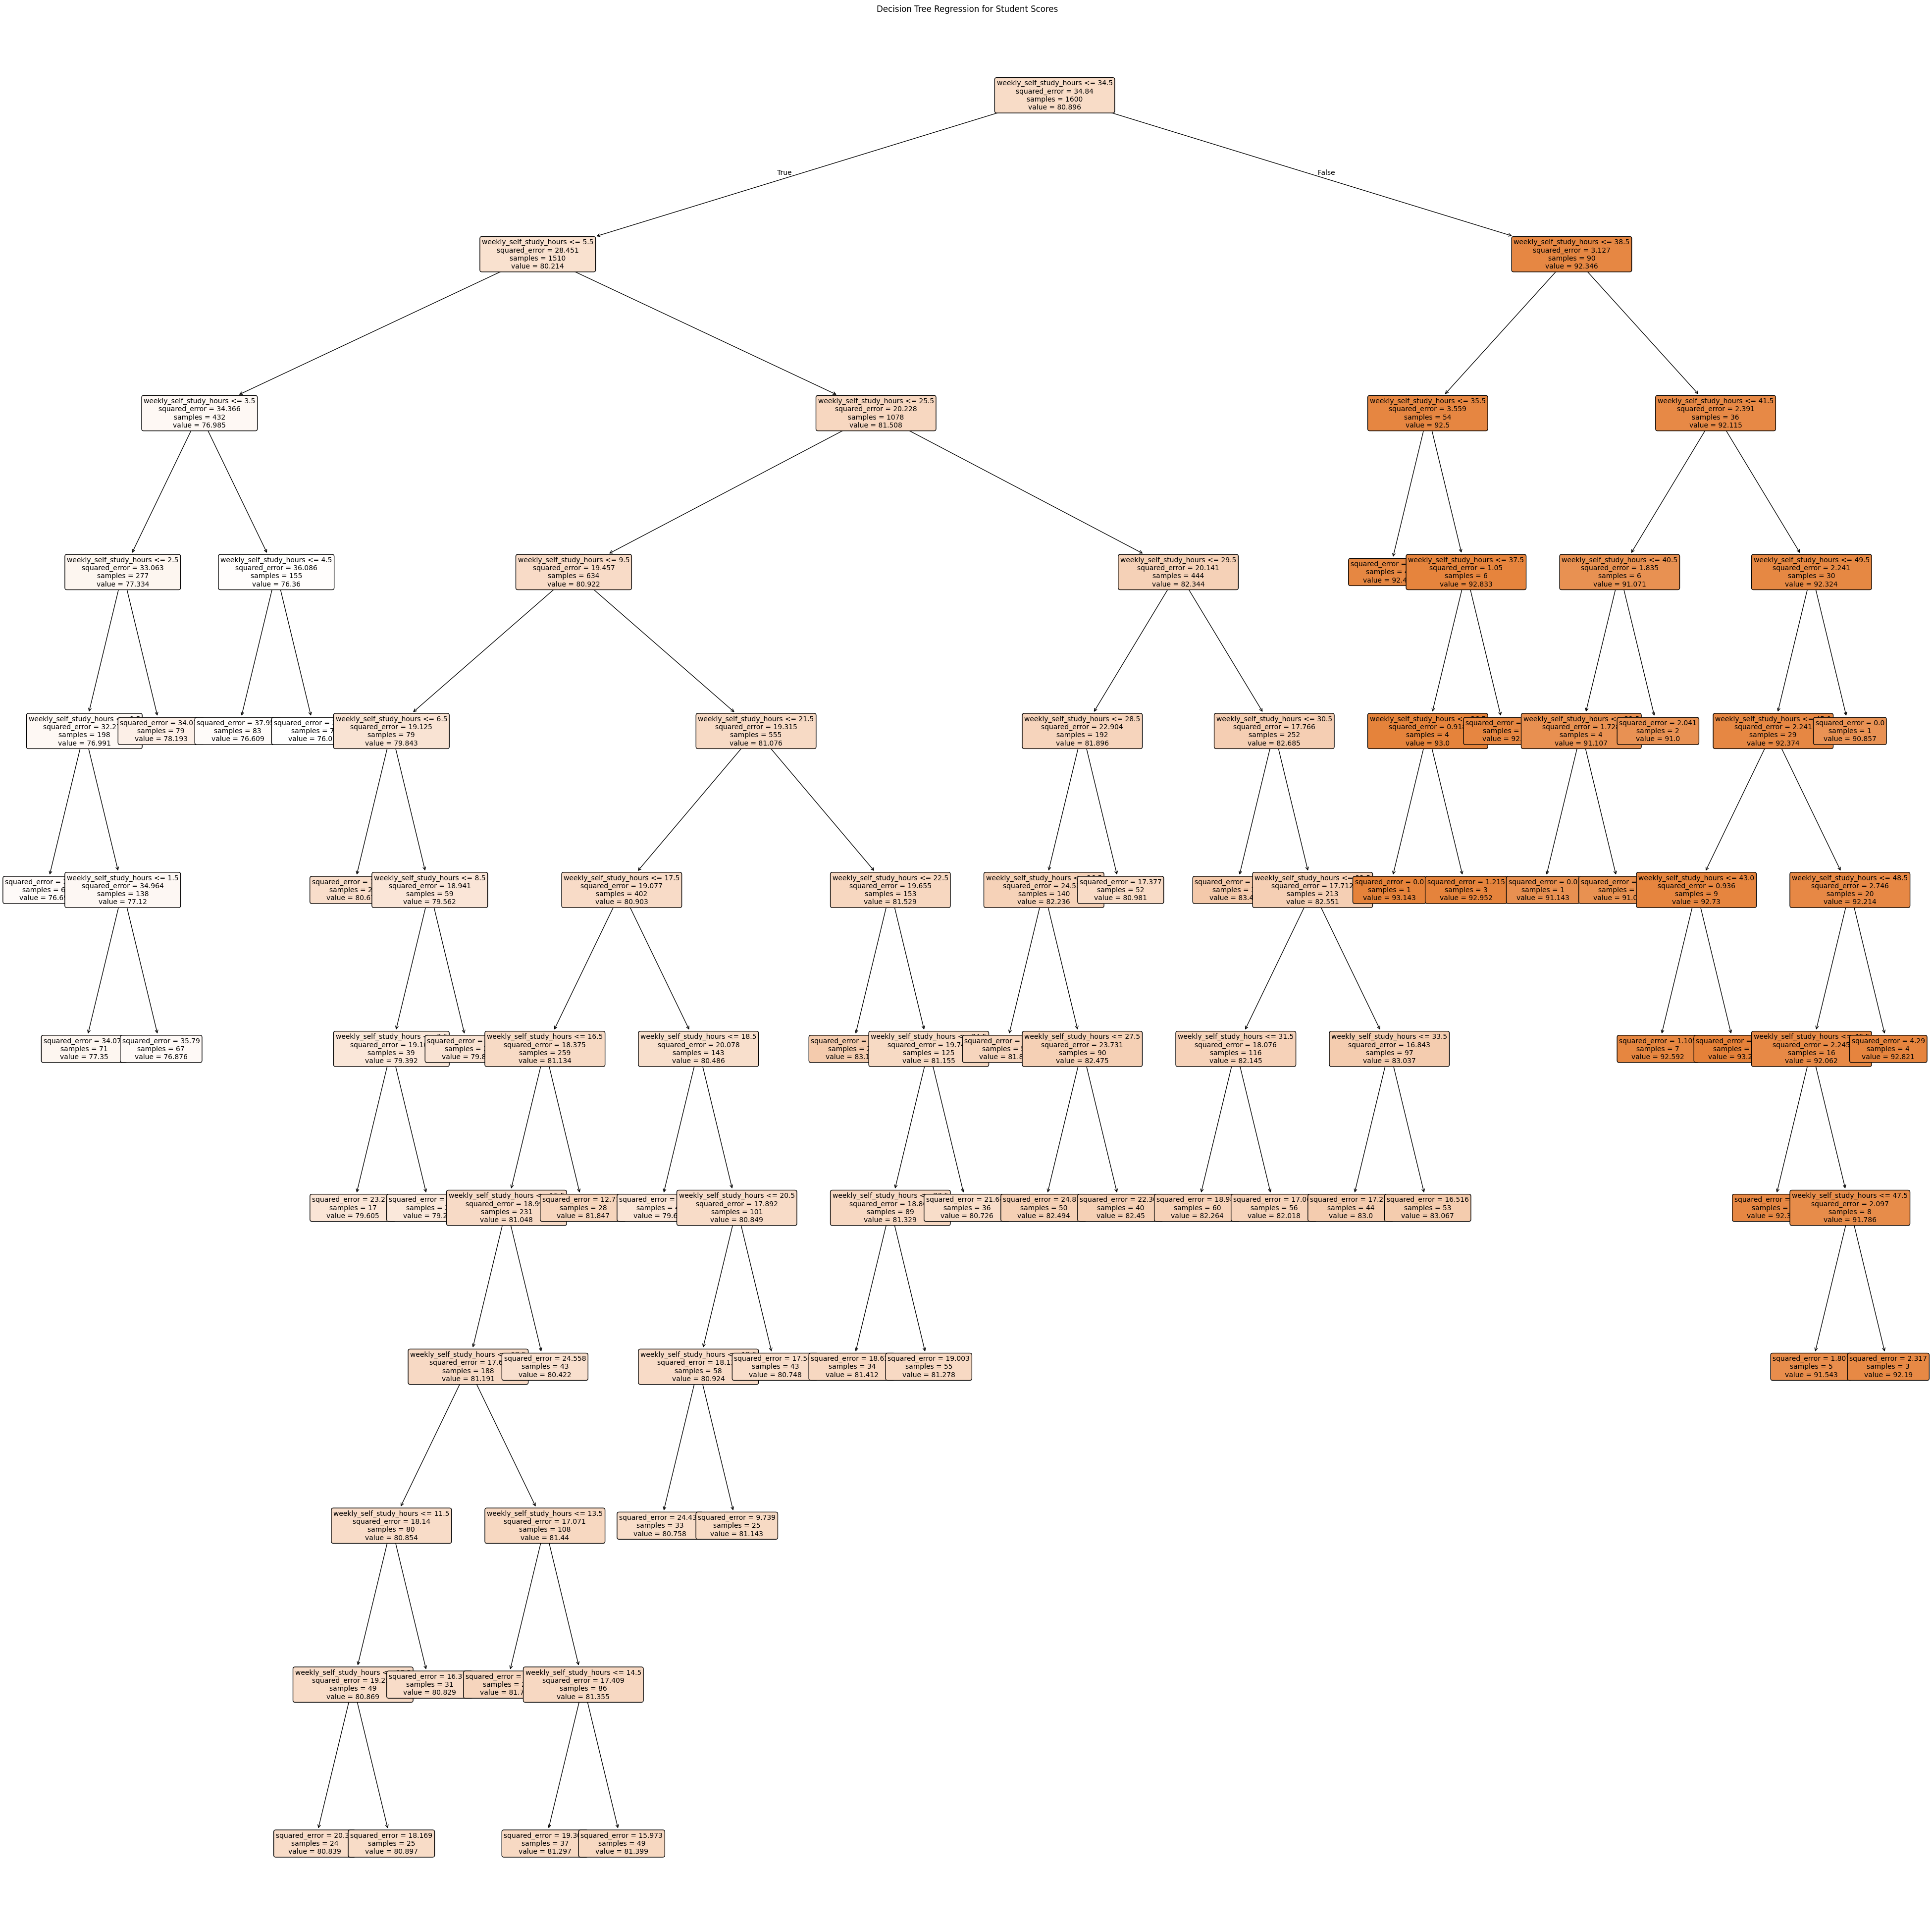

In [ ]:
plt.figure(figsize=(50, 50))
plot_tree(model, filled=True, feature_names=['weekly_self_study_hours'], rounded=True, fontsize=10)
plt.title("Decision Tree Regression for Student Scores")
plt.show()

# **Save the Model**

In [8]:
joblib.dump(model, "student_performance_model.pkl")
print("Model saved as 'student_performance_model.pkl'")

Model saved as 'student_performance_model.pkl'


# **Testing the Model by User**

**Loading the Model**

In [9]:
model = joblib.load("student_performance_model.pkl")
print("Model loaded successfully!")


Model loaded successfully!


**Single Prediction:**

In [10]:
new_data = {
    'AttendanceRate': 80,
    'StudyHoursPerWeek': 15,
    'PreviousGrade': 89,
    'ExtracurricularActivities': 2,
    'ParentalSupport': 1
}

data_df = pd.DataFrame([new_data])

predicted_score = model.predict(data_df)[0]

print(f"Predicted Final Grade: {predicted_score:.2f}")
print("\nPrediction Ended!\n\n")


Predicted Final Grade: 66.00

Prediction Ended!


